# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/mental.csv")

In [3]:
print("Rows:", len(df))
print("Columns:", len(df.columns))

Rows: 3828
Columns: 16


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [4]:
df.nunique()

index                     3828
Indicator                    4
Group                        7
State                       52
Subgroup                    72
Phase                        4
Time Period                 14
Time Period Label           14
Time Period Start Date      14
Time Period End Date        14
Value                      320
LowCI                      301
HighCI                     365
Confidence Interval       3321
Quartile Range             203
Suppression Flag             1
dtype: int64

In [5]:
unique_num = df.nunique()
biggest_num_values = unique_num.max()
biggest_num_column = unique_num.idxmax()

print(f"Column for biggest number of unique values: {biggest_num_column}")
print(f"Biggest number of unique values in a column: {biggest_num_values}")

Column for biggest number of unique values: index
Biggest number of unique values in a column: 3828


Since index stands for the number of rows, I will go for the second column that has the most unique values.

In [6]:
unique_num = unique_num.drop(biggest_num_column)
second_biggest_num_values = unique_num.max()
second_biggest_num_column = unique_num.idxmax()

print(f"Column for the second biggest number of unique values: {second_biggest_num_column}")
print(f"Second biggest number of unique values: {second_biggest_num_values}")

Column for the second biggest number of unique values: Confidence Interval
Second biggest number of unique values: 3321


Most of the columns with the highest number of values have numbers for the values, however the Question column has unique values that is displayed below.

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [7]:
for x in df.columns:
    if df[x].nunique() == 1:
          same_val_col = x
same_val_col

'Suppression Flag'

In [8]:
print("The column that has the same value is", same_val_col)

The column that has the same value is Suppression Flag


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   3828 non-null   int64  
 1   Indicator               3828 non-null   object 
 2   Group                   3828 non-null   object 
 3   State                   3828 non-null   object 
 4   Subgroup                3828 non-null   object 
 5   Phase                   3828 non-null   object 
 6   Time Period             3828 non-null   int64  
 7   Time Period Label       3828 non-null   object 
 8   Time Period Start Date  3828 non-null   object 
 9   Time Period End Date    3828 non-null   object 
 10  Value                   3740 non-null   float64
 11  LowCI                   3740 non-null   float64
 12  HighCI                  3740 non-null   float64
 13  Confidence Interval     3740 non-null   object 
 14  Quartile Range          2652 non-null   

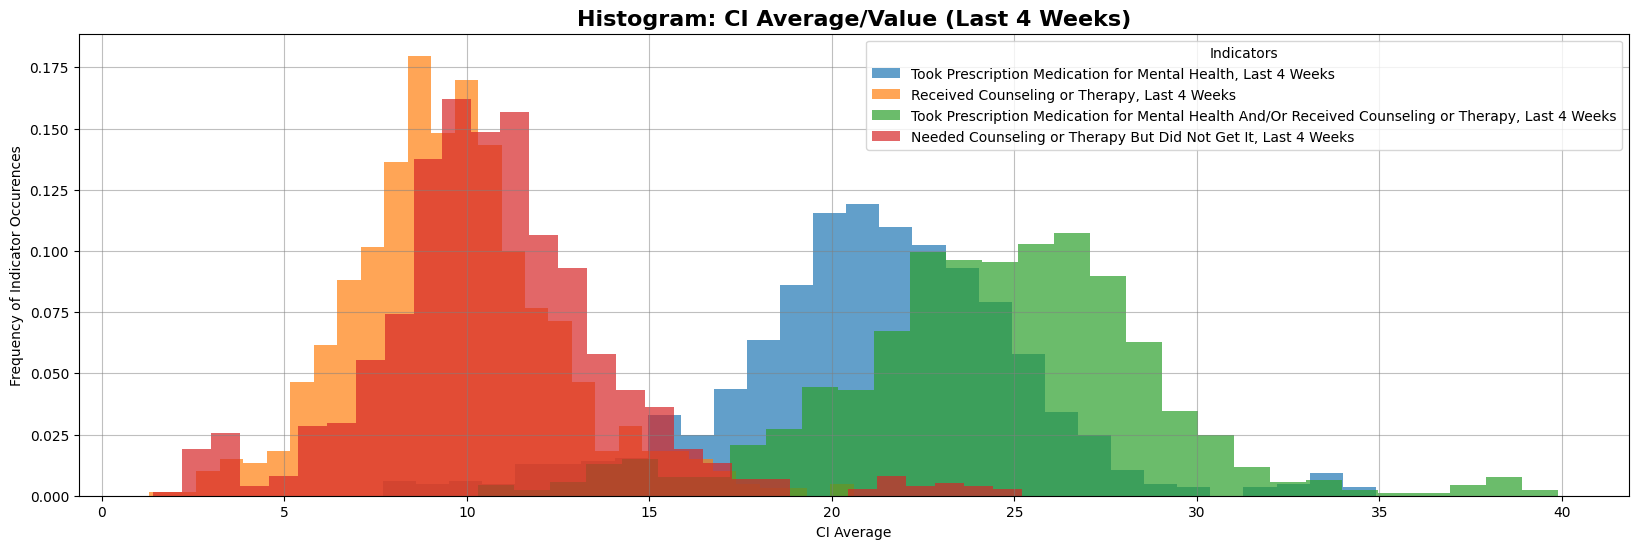

In [10]:
plt.figure(figsize=(20, 6))
for indicator in df['Indicator'].unique():
    data = df[df['Indicator'] == indicator]['Value']
    plt.hist(data, bins=30, alpha=0.7, label=indicator, density=True)

# the Value column is the the average of LowCI and HighCI column
plt.title('Histogram: CI Average/Value (Last 4 Weeks)', fontsize=16, fontweight='bold')
plt.xlabel('CI Average')
plt.ylabel('Frequency of Indicator Occurences')
plt.legend(title = 'Indicators')
plt.grid(color='gray', alpha=0.5)
plt.show()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

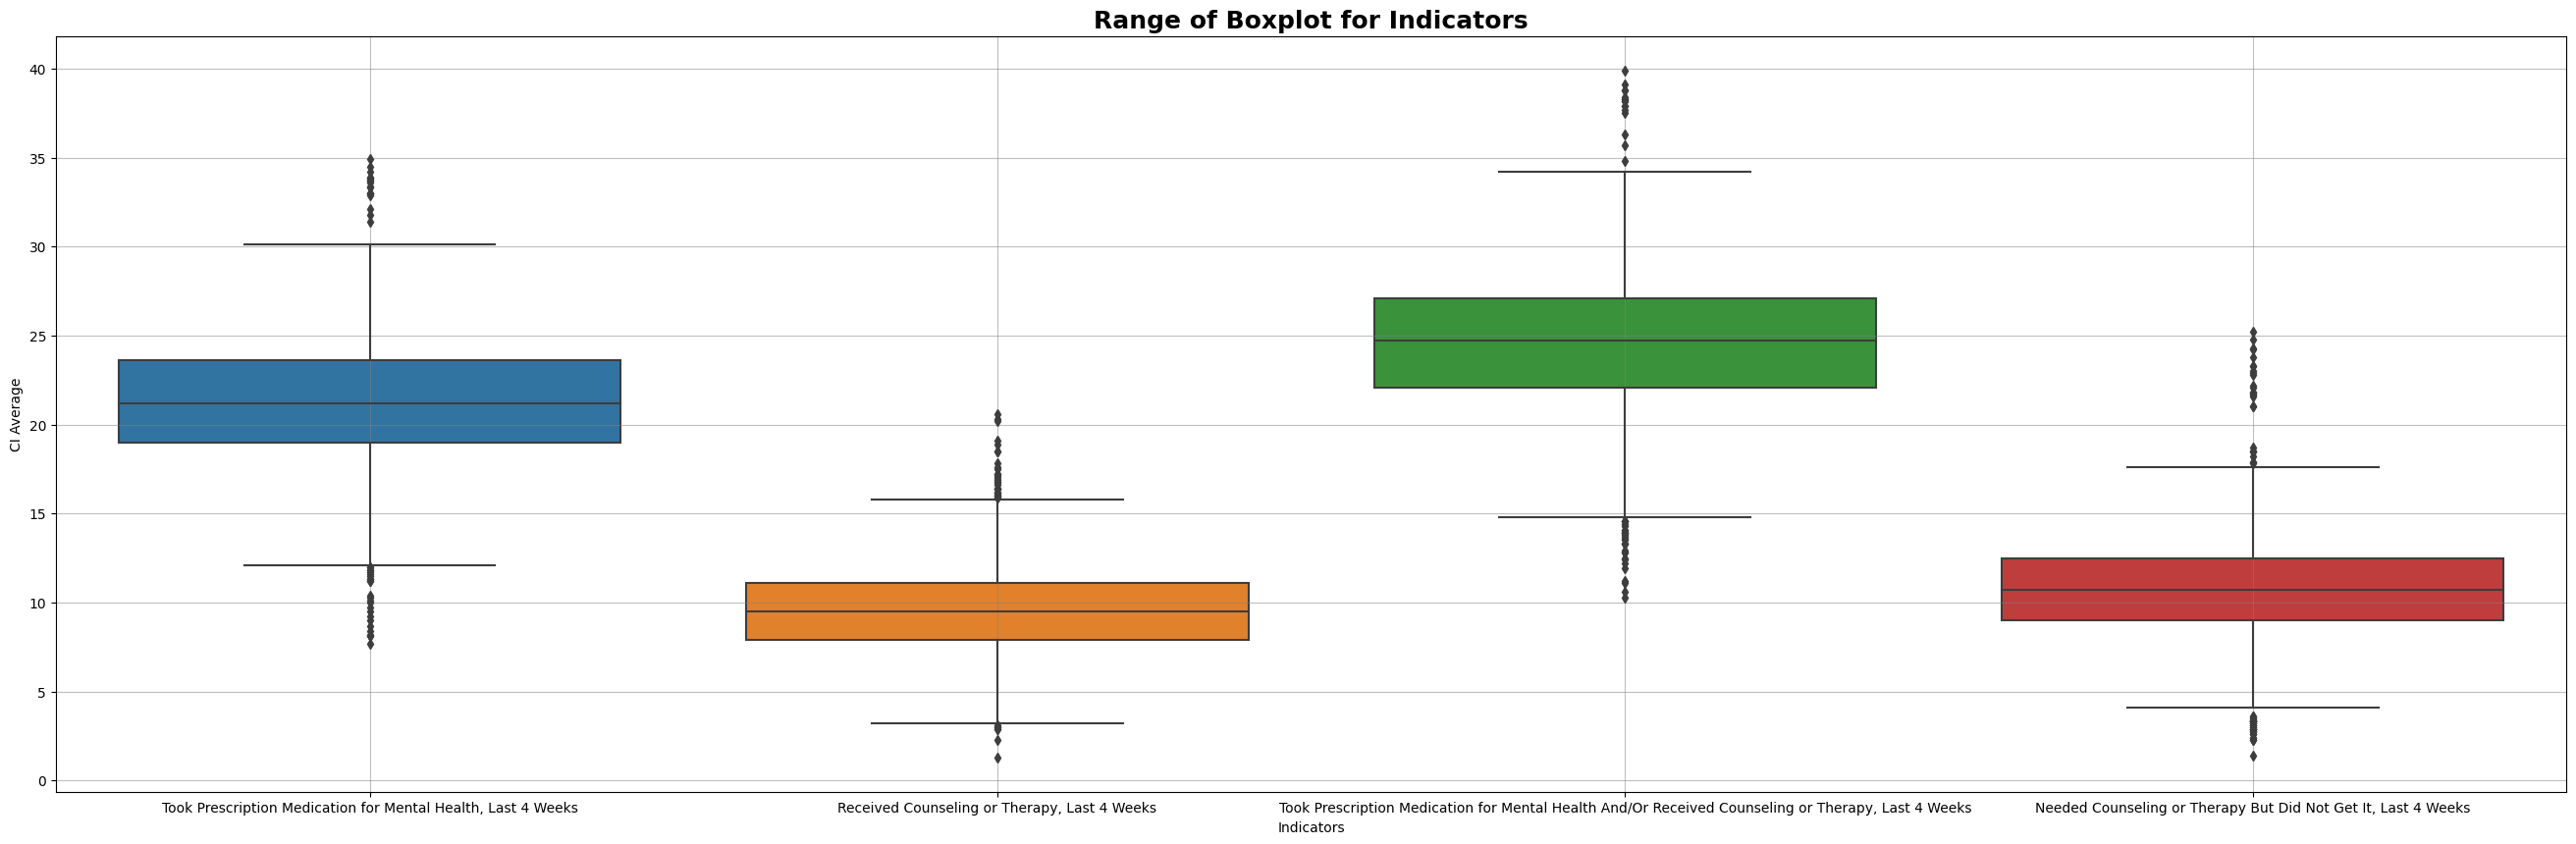

In [14]:
# Boxplot for the range of values in Indicators
plt.figure(figsize=(33, 10))
sns.boxplot(x='Indicator', y='Value', data=df)
plt.title('Range of Boxplot for Indicators', fontsize=18, fontweight='bold')
plt.xlabel('Indicators')
plt.ylabel('CI Average')
plt.grid(color='gray', alpha=0.5)
plt.show()

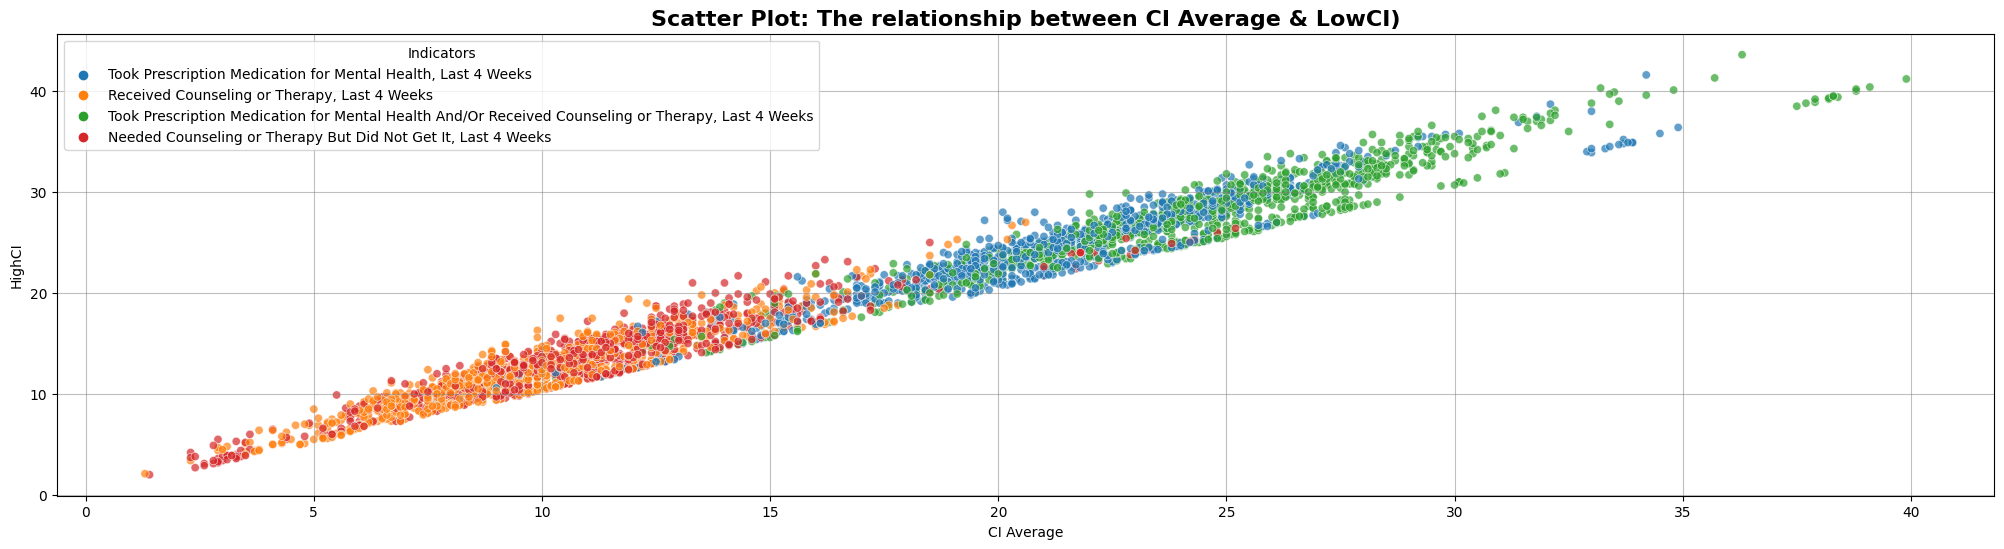

In [12]:
# Scatterplot for the relationship between Value and HighCI with displayed spots of Indicator
plt.figure(figsize=(25, 6))
sns.scatterplot(x='Value', y='HighCI', data=df, hue='Indicator', alpha=0.7)
plt.title('Scatter Plot: The relationship between CI Average & LowCI)', fontsize=16, fontweight='bold')
plt.xlabel('CI Average')
plt.ylabel('HighCI')
plt.legend(title='Indicators')
plt.grid(color='gray', alpha=0.5)
plt.show()



---



## Submitting Your Work

Submit your work as usual.